## DATASET


In [1]:
'''IMPORTS'''
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

'''Importando o dataset'''

exoplanetas = pd.read_csv("Exoplanets.csv", sep=',')
df = pd.DataFrame(exoplanetas)


In [2]:
a = df['mass_wrt'].value_counts()
a

Earth      3586
Jupiter    1641
Name: mass_wrt, dtype: int64

In [3]:
'''Convertendo massa e raio'''

### MASSA ###

mass = []

for i in range(0, len(df['mass_wrt'])):
    
    if df['mass_wrt'][i] == 'Jupiter': 
        mass.append( 317.8 * df['mass_multiplier'][i])
    else:
        mass.append( df['mass_multiplier'][i])
        
df['mass'] = mass

df = df.drop(['mass_wrt', 'mass_multiplier'], axis=1)

### RAIO ###

radius = []

for i in range(0, len(df['radius_wrt'])):
    
    if df['radius_wrt'][i] == 'Jupiter': 
        radius.append( 11.2 * df['radius_multiplier'][i])
    else:
        radius.append( df['radius_multiplier'][i])
        
df['radius'] = radius

df = df.drop(['radius_wrt', 'radius_multiplier'], axis=1)


df # Mostrando nova tabela

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,6165.320000,12.0960
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,4684.372000,12.2080
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,1525.440000,12.8800
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,2586.513818,12.5440
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,565.684000,13.4400
...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.044210,0.007940,0.04,Transit,225.320200,15.3776
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,115.000000,1176.500000,0.00,Direct Imaging,2002.140000,12.7680
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.016340,0.005476,0.06,Radial Velocity,0.700000,0.9130
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,0.021560,0.008487,0.00,Radial Velocity,1.140000,1.0500


In [4]:
df

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,6165.320000,12.0960
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,4684.372000,12.2080
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,1525.440000,12.8800
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,2586.513818,12.5440
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,565.684000,13.4400
...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.044210,0.007940,0.04,Transit,225.320200,15.3776
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,115.000000,1176.500000,0.00,Direct Imaging,2002.140000,12.7680
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.016340,0.005476,0.06,Radial Velocity,0.700000,0.9130
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,0.021560,0.008487,0.00,Radial Velocity,1.140000,1.0500


In [5]:
'''Convertendo os dados simbolicos númeriocos'''

# Criando uma instância para a feature categórica
encoder_detection_method = OneHotEncoder()

# Aplicando a transformação e transformado em colunas de 0 e 1 em formato de DataFrame
deteccao_encoded = encoder_detection_method.fit_transform(df[['detection_method']])
deteccao_novo = pd.DataFrame(deteccao_encoded.toarray(), columns=encoder_detection_method.get_feature_names_out(['detection_method']))

# Removendo a coluna categórica no dataframe antigo
df_dropado = df.drop(['detection_method'], axis=1)

# Juntando o dataframe antigo (dropado) com o novo dataframe de colunas numéricas
df_tratado = pd.concat([df_dropado, deteccao_novo], axis=1)

df_tratado # Mostrando nova tabela

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,mass,radius,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,6165.320000,12.0960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,4684.372000,12.2080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,1525.440000,12.8800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,2586.513818,12.5440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,565.684000,13.4400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.044210,0.007940,0.04,225.320200,15.3776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,115.000000,1176.500000,0.00,2002.140000,12.7680,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.016340,0.005476,0.06,0.700000,0.9130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,0.021560,0.008487,0.00,1.140000,1.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
'''Ajustes finais'''

# Retirando colunas desinteressantes
df_tratado = df_tratado.drop(['name', 'distance', 'discovery_year'], axis=1)

# Retirando valores nan
df_tratado = df_tratado.dropna()

# Ajustando o index
df_tratado = df_tratado.reset_index(drop=True)

df_tratado # Mostrando nova tabela


,stellar_magnitude,planet_type,orbital_radius,orbital_period,eccentricity,mass,radius,detection_method_Astrometry,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,4.72307,Gas Giant,1.290000,0.892539,0.23,6165.320000,12.0960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.01300,Gas Giant,1.530000,1.400000,0.08,4684.372000,12.2080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5.23133,Gas Giant,0.830000,0.508693,0.00,1525.440000,12.8800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6.61935,Gas Giant,2.773069,4.800000,0.37,2586.513818,12.5440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6.21500,Gas Giant,1.660000,2.200000,0.68,565.684000,13.4400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,10.52100,Gas Giant,0.044210,0.007940,0.04,225.320200,15.3776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4773,10.88500,Gas Giant,115.000000,1176.500000,0.00,2002.140000,12.7680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4774,12.07400,Terrestrial,0.016340,0.005476,0.06,0.700000,0.9130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4775,12.07400,Super Earth,0.021560,0.008487,0.00,1.140000,1.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   stellar_magnitude                               4777 non-null   float64
 1   planet_type                                     4777 non-null   object 
 2   orbital_radius                                  4777 non-null   float64
 3   orbital_period                                  4777 non-null   float64
 4   eccentricity                                    4777 non-null   float64
 5   mass                                            4777 non-null   float64
 6   radius                                          4777 non-null   float64
 7   detection_method_Astrometry                     4777 non-null   float64
 8   detection_method_Direct Imaging                 4777 non-null   float64
 9   detection_method_Disk Kinematics         

In [8]:
a = pd.isnull(df_tratado).sum()
a

stellar_magnitude                                 0
planet_type                                       0
orbital_radius                                    0
orbital_period                                    0
eccentricity                                      0
mass                                              0
radius                                            0
detection_method_Astrometry                       0
detection_method_Direct Imaging                   0
detection_method_Disk Kinematics                  0
detection_method_Eclipse Timing Variations        0
detection_method_Gravitational Microlensing       0
detection_method_Orbital Brightness Modulation    0
detection_method_Pulsar Timing                    0
detection_method_Pulsation Timing Variations      0
detection_method_Radial Velocity                  0
detection_method_Transit                          0
detection_method_Transit Timing Variations        0
dtype: int64

In [9]:
itens_unicos = df[''].unique()
print(itens_unicos)

KeyError: ''

# **Realizando as previsões a partir de diferentes modelos**

Nesta etapa, serão realizadas as previsões dos dados a partir dos dados tratados, aplicando 5 modelos distintos. O target deste dataset refere-se justamente a qual tipo de planeta aquele exoplaneta com determinadas características observadas ele se encaixará. Para isso, é necessário compreender que, pelo motivo de haver um target categórico, não se torna possível aplicar regressores lineares para prever os resultados. Além desse motivo, ressalta-se que esse esse tipo de target não é binário, isto é, temos mais que apenas duas opções para classificar os inputs recebidos:

- SuperEarth 
- Neptune-like
- Terrestrial
- Gas giant

Portanto, serão aplicados modelos classificadores capazes de receber como input uma mistura de dados categóricos (transformados para numéricos pelo OneHotEncoder) e numéricos e obter um output de um dos 4 possíveis tipos de planeta. Os modelos aplicados são:

- KNeighborsClassifier
- DecisionTree
- RandomForest
- LogisticRegression
- Adaboost

Sendo que serão feitas as comparações em relação às performances para cada um dos tipos.


## KneighborsClassifier

O K-NN é um modelo amplamente utilizado para modelos de previsão de dados. A sua aplicabilidade torna-se útil por admitir regressão e classificação para as informações.

Este modelo recebe um determinado dado em que não estava classificado anteriormente. Em seguida, são calculadas as distâncias em relação a todos os outros dados existentes no dataset (calculando distância Euclidiana, Manhattan, Minkowski ou Ponderada) 

## Aplicando floresta aleatória

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  # Altere o número de folds conforme necessário

# Divisão do conjunto de dados
df_treino, df_teste = train_test_split(
    df_tratado, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

X_treino = df_treino.drop('planet_type', axis=1)
y_treino = df_treino['planet_type']

X_teste = df_teste.drop('planet_type', axis=1)
y_teste = df_teste['planet_type']

# Definição do modelo de Floresta Aleatória
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# Definição do espaço de busca para hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados
busca_rf = GridSearchCV(
    modelo_rf,
    param_grid,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_rf.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros = busca_rf.best_params_

# Treinando o modelo otimizado com os melhores hiperparâmetros
modelo_rf_otimizado = RandomForestClassifier(random_state=SEMENTE_ALEATORIA, **melhores_hiperparametros)
modelo_rf_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado
y_previsao_otimizado = modelo_rf_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado
acuracia_otimizado = accuracy_score(y_teste, y_previsao_otimizado)
precisao_otimizado = precision_score(y_teste, y_previsao_otimizado, average='macro')
recall_otimizado = recall_score(y_teste, y_previsao_otimizado, average='macro')
f1_otimizado = f1_score(y_teste, y_previsao_otimizado, average='macro')

# Treinando o modelo não otimizado
modelo_rf.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado = modelo_rf.predict(X_teste)

# Avaliando métricas do modelo não otimizado
acuracia_nao_otimizado = accuracy_score(y_teste, y_previsao_nao_otimizado)
f1_nao_otimizado = f1_score(y_teste, y_previsao_nao_otimizado, average='macro')
recall_nao_otimizado = recall_score(y_teste, y_previsao_nao_otimizado, average='macro')
precisao_nao_otimizado = precision_score(y_teste, y_previsao_nao_otimizado, average='macro')

print(f"A acurácia do modelo floresta aleatória sem otimização foi de {acuracia_nao_otimizado}")
print(f"A acurácia do modelo final com otimização foi de {acuracia_otimizado}")
print(f"Precisão do modelo não otimizado: {precisao_nao_otimizado}")
print(f"Precisão do modelo final: {precisao_otimizado}")
print(f"Recall do modelo não otimizado: {recall_nao_otimizado}")
print(f"Recall do modelo final: {recall_otimizado}")
print(f"F1-score do modelo não otimizado: {f1_nao_otimizado}")
print(f"F1-score do modelo final: {f1_otimizado}")
print("Melhores hiperparâmetros:", melhores_hiperparametros)


A acurácia do modelo floresta aleatória sem otimização foi de 0.9707112970711297
A acurácia do modelo final com otimização foi de 0.9721059972105998
Precisão do modelo não otimizado: 0.9653635947385948
Precisão do modelo final: 0.9671633751089415
Recall do modelo não otimizado: 0.964323404621912
Recall do modelo final: 0.9783926686911761
F1-score do modelo não otimizado: 0.9647261002193983
F1-score do modelo final: 0.9723912444220854
Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


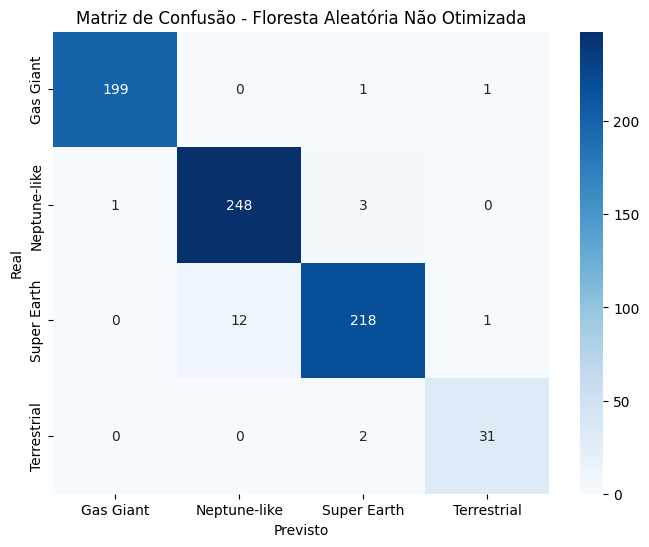

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treinando o modelo não otimizado
modelo_rf.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado = modelo_rf.predict(X_teste)

# Criando a matriz de confusão para o modelo não otimizado
confusao_rf_nao_otimizado = confusion_matrix(y_teste, y_previsao_nao_otimizado)

# Exibindo a matriz de confusão usando o Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusao_rf_nao_otimizado, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusão - Floresta Aleatória Não Otimizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


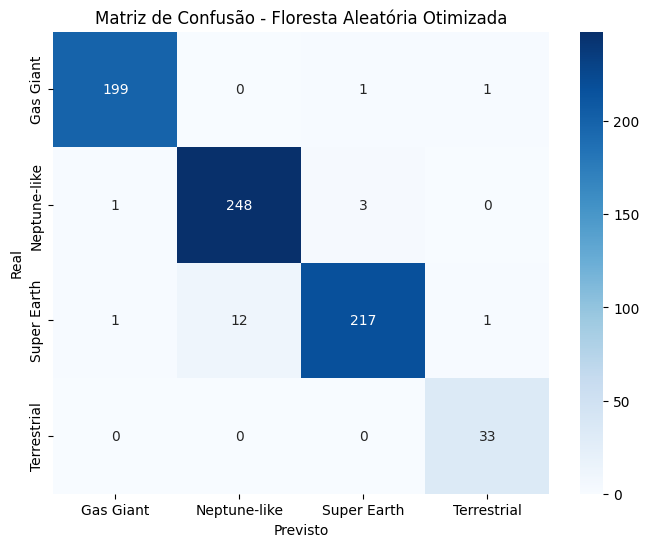

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criando a matriz de confusão para o modelo otimizado
confusao_rf_otimizado = confusion_matrix(y_teste, y_previsao_otimizado)

# Exibindo a matriz de confusão usando o Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusao_rf_otimizado, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title('Matriz de Confusão - Floresta Aleatória Otimizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


## Aplicando adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

modelo_1 = abc.fit(X_treino, y_treino)

y_previsao = modelo_1.predict(X_teste)

y_previsao


array([3, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3,
       1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1,

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  # Altere o número de folds conforme necessário

# Divisão do conjunto de dados
FEATURES = df_tratado.drop(['planet_type'], axis=1)
TARGET = df_tratado['planet_type']

le = LabelEncoder()
TARGET = le.fit_transform(TARGET)

X_treino, X_teste, y_treino, y_teste = train_test_split(
    FEATURES, TARGET, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

# Definição do modelo AdaBoost
modelo_adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Definição do espaço de busca para hiperparâmetros
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados
busca_adaboost = GridSearchCV(
    modelo_adaboost,
    param_grid_adaboost,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_adaboost.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_adaboost = busca_adaboost.best_params_

# Treinando o modelo otimizado com os melhores hiperparâmetros
modelo_adaboost_otimizado = AdaBoostClassifier(random_state=SEMENTE_ALEATORIA, **melhores_hiperparametros_adaboost)
modelo_adaboost_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado
y_previsao_otimizado_adaboost = modelo_adaboost_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado
acuracia_otimizado_adaboost = accuracy_score(y_teste, y_previsao_otimizado_adaboost)
precisao_otimizado_adaboost = precision_score(y_teste, y_previsao_otimizado_adaboost, average='macro')
recall_otimizado_adaboost = recall_score(y_teste, y_previsao_otimizado_adaboost, average='macro')
f1_otimizado_adaboost = f1_score(y_teste, y_previsao_otimizado_adaboost, average='macro')

# Treinando o modelo não otimizado
modelo_adaboost.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado_adaboost = modelo_adaboost.predict(X_teste)

# Avaliando métricas do modelo não otimizado
acuracia_nao_otimizado_adaboost = accuracy_score(y_teste, y_previsao_nao_otimizado_adaboost)
f1_nao_otimizado_adaboost = f1_score(y_teste, y_previsao_nao_otimizado_adaboost, average='macro')
recall_nao_otimizado_adaboost = recall_score(y_teste, y_previsao_nao_otimizado_adaboost, average='macro')
precisao_nao_otimizado_adaboost = precision_score(y_teste, y_previsao_nao_otimizado_adaboost, average='macro')

print(f"A acurácia do modelo AdaBoost sem otimização foi de {acuracia_nao_otimizado_adaboost}")
print(f"A acurácia do modelo AdaBoost final com otimização foi de {acuracia_otimizado_adaboost}")
print(f"Precisão do modelo AdaBoost não otimizado: {precisao_nao_otimizado_adaboost}")
print(f"Precisão do modelo AdaBoost final: {precisao_otimizado_adaboost}")
print(f"Recall do modelo AdaBoost não otimizado: {recall_nao_otimizado_adaboost}")
print(f"Recall do modelo AdaBoost final: {recall_otimizado_adaboost}")
print(f"F1-score do modelo AdaBoost não otimizado: {f1_nao_otimizado_adaboost}")
print(f"F1-score do modelo AdaBoost final: {f1_otimizado_adaboost}")
print("Melhores hiperparâmetros AdaBoost:", melhores_hiperparametros_adaboost)


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A acurácia do modelo AdaBoost sem otimização foi de 0.7099023709902371
A acurácia do modelo AdaBoost final com otimização foi de 0.9177126917712691
Precisão do modelo AdaBoost não otimizado: 0.8375586953798916
Precisão do modelo AdaBoost final: 0.6909754067771309
Recall do modelo AdaBoost não otimizado: 0.7554301005793543
Recall do modelo AdaBoost final: 0.7219893497878572
F1-score do modelo AdaBoost não otimizado: 0.7075381214049409
F1-score do modelo AdaBoost final: 0.7060024343584095
Melhores hiperparâmetros AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}


## Aplicando o regression logistic

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  # Altere o número de folds conforme necessário

# Divisão do conjunto de dados
FEATURES = df_tratado.drop(['planet_type'], axis=1)
TARGET = df_tratado['planet_type']

X_treino, X_teste, y_treino, y_teste = train_test_split(
    FEATURES, TARGET, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

# Definição do modelo de regressão logística (multinomial)
multi_logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Definição do espaço de busca para hiperparâmetros
param_grid_multi_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados para o modelo multinomial
busca_multi_logreg = GridSearchCV(
    multi_logreg,
    param_grid_multi_logreg,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_multi_logreg.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_multi_logreg = busca_multi_logreg.best_params_

# Treinando o modelo otimizado multinomial com os melhores hiperparâmetros
modelo_multi_logreg_otimizado = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs',
                                                   **melhores_hiperparametros_multi_logreg)
modelo_multi_logreg_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado multinomial
y_previsao_otimizado_multi_logreg = modelo_multi_logreg_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado multinomial
acuracia_otimizado_multi_logreg = accuracy_score(y_teste, y_previsao_otimizado_multi_logreg)
precisao_otimizado_multi_logreg = precision_score(y_teste, y_previsao_otimizado_multi_logreg, average='macro')
recall_otimizado_multi_logreg = recall_score(y_teste, y_previsao_otimizado_multi_logreg, average='macro')
f1_otimizado_multi_logreg = f1_score(y_teste, y_previsao_otimizado_multi_logreg, average='macro')

# Definição do modelo de regressão logística (ovr)
ovr_logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

# Realização da busca por hiperparâmetros otimizados para o modelo ovr
busca_ovr_logreg = GridSearchCV(
    ovr_logreg,
    param_grid_multi_logreg,  # Usando o mesmo espaço de busca para economizar tempo
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_ovr_logreg.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_ovr_logreg = busca_ovr_logreg.best_params_

# Treinando o modelo otimizado ovr com os melhores hiperparâmetros
modelo_ovr_logreg_otimizado = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear',
                                                 **melhores_hiperparametros_ovr_logreg)
modelo_ovr_logreg_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado ovr
y_previsao_otimizado_ovr_logreg = modelo_ovr_logreg_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado ovr
acuracia_otimizado_ovr_logreg = accuracy_score(y_teste, y_previsao_otimizado_ovr_logreg)
precisao_otimizado_ovr_logreg = precision_score(y_teste, y_previsao_otimizado_ovr_logreg, average='macro')
recall_otimizado_ovr_logreg = recall_score(y_teste, y_previsao_otimizado_ovr_logreg, average='macro')
f1_otimizado_ovr_logreg = f1_score(y_teste, y_previsao_otimizado_ovr_logreg, average='macro')

print(f"A acurácia do modelo de Regressão Logística (multinomial) sem otimização foi de {a}")
print(f"A acurácia do modelo de Regressão Logística (multinomial) final com otimização foi de {acuracia_otimizado_multi_logreg}")
print(f"Precisão do modelo de Regressão Logística (multinomial) não otimizado: {precisao_otimizado_multi_logreg}")
print(f"Precisão do modelo de Regressão Logística (multinomial) final: {precisao_otimizado_multi_logreg}")
print(f"Recall do modelo de Regressão Logística (multinomial) não otimizado: {recall_otimizado_multi_logreg}")
print(f"Recall do modelo de Regressão Logística (multinomial) final: {recall_otimizado_multi_logreg}")
print(f"F1-score do modelo de Regressão Logística (multinomial) não otimizado: {f1_otimizado_multi_logreg}")
print(f"F1-score do modelo de Regressão Logística (multinomial) final: {f1_otimizado_multi_logreg}")
print("Melhores hiperparâmetros Regressão Logística (multinomial):", melhores_hiperparametros_multi_logreg)

print(f"A acurácia do modelo de Regressão Logística (ovr) sem otimização foi de {b}")
print(f"A acurácia do modelo de Regressão Logística (ovr) final com otimização foi de {acuracia_otimizado_ovr_logreg}")
print(f"Precisão do modelo de Regressão Logística (ovr) não otimizado: {precisao_otimizado_ovr_logreg}")
print(f"Precisão do modelo de Regressão Logística (ovr) final: {precisao_otimizado_ovr_logreg}")
print(f"Recall do modelo de Regressão Logística (ovr) não otimizado: {recall_otimizado_ovr_logreg}")
print(f"Recall do modelo de Regressão Logística (ovr) final: {recall_otimizado_ovr_logreg}")
print(f"F1-score do modelo de Regressão Logística (ovr) não otimizado: {f1_otimizado_ovr_logreg}")
print(f"F1-score do modelo de Regressão Logística (ovr) final: {f1_otimizado_ovr_logreg}")
print("Melhores hiperparâmetros Regressão Logística (ovr):", melhores_hiperparametros_ovr_logreg)


c:\venv\ilumpy\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\venv\ilumpy\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

A acurácia do modelo de Regressão Logística (multinomial) sem otimização foi de 0.9344490934449093
A acurácia do modelo de Regressão Logística (multinomial) final com otimização foi de 0.9483960948396095
Precisão do modelo de Regressão Logística (multinomial) não otimizado: 0.9423067348008386
Precisão do modelo de Regressão Logística (multinomial) final: 0.9423067348008386
Recall do modelo de Regressão Logística (multinomial) não otimizado: 0.933735004630527
Recall do modelo de Regressão Logística (multinomial) final: 0.933735004630527
F1-score do modelo de Regressão Logística (multinomial) não otimizado: 0.9377219738082
F1-score do modelo de Regressão Logística (multinomial) final: 0.9377219738082
Melhores hiperparâmetros Regressão Logística (multinomial): {'C': 100}
A acurácia do modelo de Regressão Logística (ovr) sem otimização foi de 0.895397489539749
A acurácia do modelo de Regressão Logística (ovr) final com otimização foi de 0.8967921896792189
Precisão do modelo de Regressão Lo

In [25]:
from sklearn.linear_model import LogisticRegression

FEATURES = df_tratado.drop(['planet_type'], axis=1)
TARGET = df_tratado['planet_type']

X_treino, X_teste, y_treino, y_teste = train_test_split(
    FEATURES, TARGET, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

multi_logreg = LogisticRegression(max_iter = 1000, multi_class='multinomial',
                                  solver='lbfgs')
multi_logreg.fit(X_treino, y_treino)

ovr_logreg = LogisticRegression(max_iter = 1000, multi_class='ovr',
                                solver='liblinear')
ovr_logreg.fit(X_treino, y_treino)

# previsao
y_pred_multi = multi_logreg.predict(X_teste)
y_pred_ovr = ovr_logreg.predict(X_teste)

a = accuracy_score(y_teste, y_pred_multi)
b = accuracy_score(y_teste, y_pred_ovr) 

print(a)
print()
print(b)
print()
print("A acurácia do modelo de regressão logística é:", acuracia_logistic_regression)

0.9344490934449093

0.895397489539749



c:\venv\ilumpy\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'acuracia_logistic_regression' is not defined

In [23]:
from sklearn.svm import SVC

model = SVC(decision_function_shape='ovo')

model.fit(X_treino, y_treino)

y_pred_OVO = model.predict(X_teste)

c = accuracy_score(y_teste, y_pred_OVO) 

c

0.497907949790795

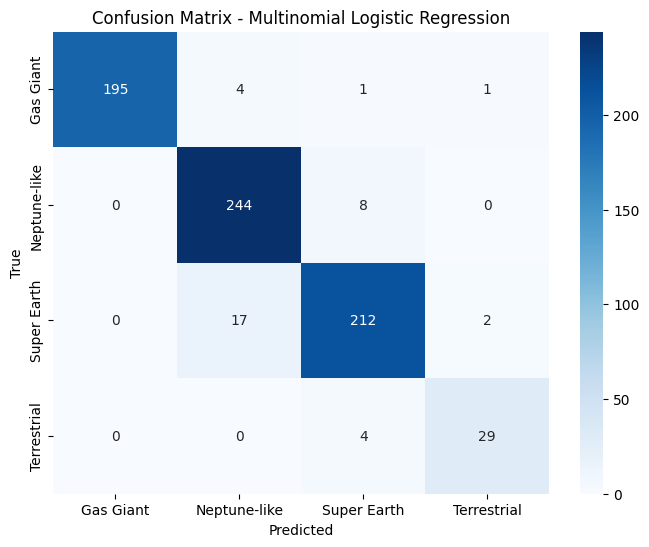

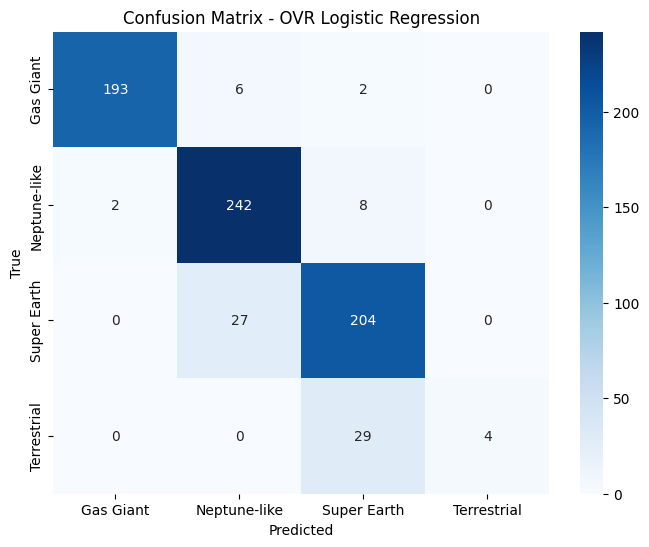

c:\venv\ilumpy\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


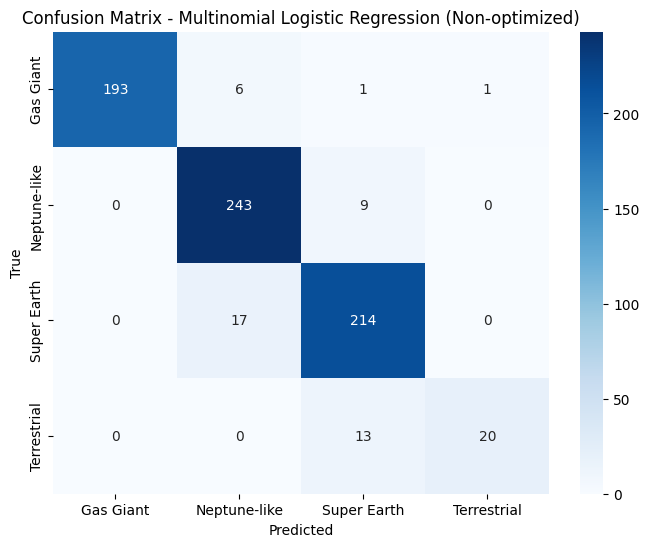

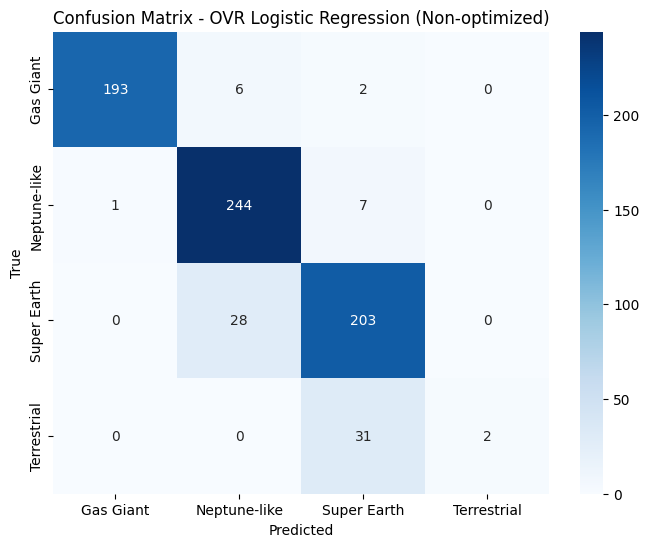

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Matriz de confusão para Regressão Logística (multinomial)
plot_confusion_matrix(y_teste, y_previsao_otimizado_multi_logreg, 'Confusion Matrix - Multinomial Logistic Regression')

# Matriz de confusão para Regressão Logística (ovr)
plot_confusion_matrix(y_teste, y_previsao_otimizado_ovr_logreg, 'Confusion Matrix - OVR Logistic Regression')

# Definição do modelo de regressão logística (multinomial)
multi_logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Treinando o modelo não otimizado multinomial
multi_logreg.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado multinomial
y_previsao_nao_otimizado_multi_logreg = multi_logreg.predict(X_teste)

# Matriz de confusão para Regressão Logística (multinomial) não otimizada
plot_confusion_matrix(y_teste, y_previsao_nao_otimizado_multi_logreg, 'Confusion Matrix - Multinomial Logistic Regression (Non-optimized)')

# Definição do modelo de regressão logística (ovr)
ovr_logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

# Treinando o modelo não otimizado ovr
ovr_logreg.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado ovr
y_previsao_nao_otimizado_ovr_logreg = ovr_logreg.predict(X_teste)

# Matriz de confusão para Regressão Logística (ovr) não otimizada
plot_confusion_matrix(y_teste, y_previsao_nao_otimizado_ovr_logreg, 'Confusion Matrix - OVR Logistic Regression (Non-optimized)')



## ÁRVORE DE DECISÃO

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
NUM_FOLDS = 5  # Altere o número de folds conforme necessário

# Divisão do conjunto de dados
df_treino, df_teste = train_test_split(
    df_tratado, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

X_treino = df_treino.drop('planet_type', axis=1)
y_treino = df_treino['planet_type']

X_teste = df_teste.drop('planet_type', axis=1)
y_teste = df_teste['planet_type']

# Definição do modelo de Árvore de Decisão
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)

# Definição do espaço de busca para hiperparâmetros
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Estratégia de validação cruzada estratificada
cv_stratified = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEMENTE_ALEATORIA)

# Realização da busca por hiperparâmetros otimizados
busca_dt = GridSearchCV(
    modelo_dt,
    param_grid_dt,
    cv=cv_stratified,
    scoring="accuracy",
    refit=True,
    n_jobs=-1
)

busca_dt.fit(X_treino, y_treino)

# Obtendo os melhores hiperparâmetros
melhores_hiperparametros_dt = busca_dt.best_params_

# Treinando o modelo otimizado com os melhores hiperparâmetros
modelo_dt_otimizado = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA, **melhores_hiperparametros_dt)
modelo_dt_otimizado.fit(X_treino, y_treino)

# Fazendo previsões com o modelo otimizado
y_previsao_otimizado_dt = modelo_dt_otimizado.predict(X_teste)

# Avaliando métricas do modelo otimizado
acuracia_otimizado_dt = accuracy_score(y_teste, y_previsao_otimizado_dt)
precisao_otimizado_dt = precision_score(y_teste, y_previsao_otimizado_dt, average='macro')
recall_otimizado_dt = recall_score(y_teste, y_previsao_otimizado_dt, average='macro')
f1_otimizado_dt = f1_score(y_teste, y_previsao_otimizado_dt, average='macro')

# Treinando o modelo não otimizado
modelo_dt.fit(X_treino, y_treino)

# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado_dt = modelo_dt.predict(X_teste)

# Avaliando métricas do modelo não otimizado
acuracia_nao_otimizado_dt = accuracy_score(y_teste, y_previsao_nao_otimizado_dt)
f1_nao_otimizado_dt = f1_score(y_teste, y_previsao_nao_otimizado_dt, average='macro')
recall_nao_otimizado_dt = recall_score(y_teste, y_previsao_nao_otimizado_dt, average='macro')
precisao_nao_otimizado_dt = precision_score(y_teste, y_previsao_nao_otimizado_dt, average='macro')

print(f"A acurácia do modelo Árvore de Decisão sem otimização foi de {acuracia_nao_otimizado_dt}")
print(f"A acurácia do modelo Árvore de Decisão final com otimização foi de {acuracia_otimizado_dt}")
print(f"Precisão do modelo Árvore de Decisão não otimizado: {precisao_nao_otimizado_dt}")
print(f"Precisão do modelo Árvore de Decisão final: {precisao_otimizado_dt}")
print(f"Recall do modelo Árvore de Decisão não otimizado: {recall_nao_otimizado_dt}")
print(f"Recall do modelo Árvore de Decisão final: {recall_otimizado_dt}")
print(f"F1-score do modelo Árvore de Decisão não otimizado: {f1_nao_otimizado_dt}")
print(f"F1-score do modelo Árvore de Decisão final: {f1_otimizado_dt}")
print("Melhores hiperparâmetros Árvore de Decisão:", melhores_hiperparametros_dt)


A acurácia do modelo Árvore de Decisão sem otimização foi de 0.9762900976290098
A acurácia do modelo Árvore de Decisão final com otimização foi de 0.9804741980474198
Precisão do modelo Árvore de Decisão não otimizado: 0.9758854529954275
Precisão do modelo Árvore de Decisão final: 0.9788802339768006
Recall do modelo Árvore de Decisão não otimizado: 0.9752361030346105
Recall do modelo Árvore de Decisão final: 0.9784828562813637
F1-score do modelo Árvore de Decisão não otimizado: 0.9755448970768927
F1-score do modelo Árvore de Decisão final: 0.9786708215156491
Melhores hiperparâmetros Árvore de Decisão: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


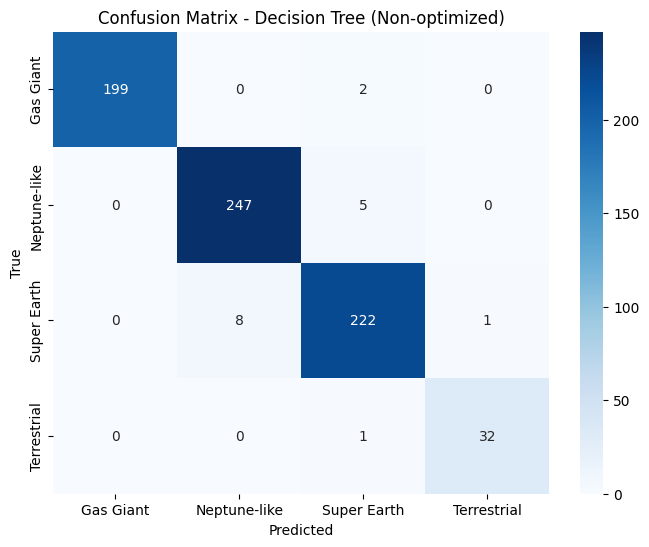

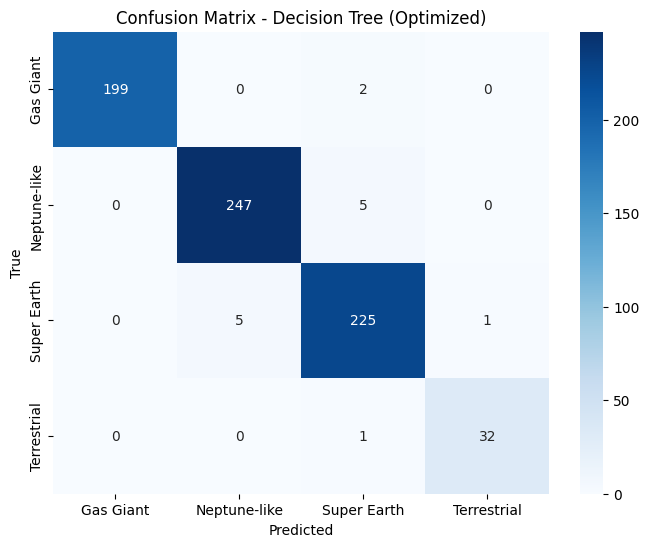

In [44]:
# Fazendo previsões com o modelo não otimizado
y_previsao_nao_otimizado_dt = modelo_dt.predict(X_teste)

# Matriz de confusão para Árvore de Decisão não otimizada
plot_confusion_matrix(y_teste, y_previsao_nao_otimizado_dt, 'Confusion Matrix - Decision Tree (Non-optimized)')

# Matriz de confusão para Árvore de Decisão otimizada
plot_confusion_matrix(y_teste, y_previsao_otimizado_dt, 'Confusion Matrix - Decision Tree (Optimized)')

## K-NN como classificador

<AxesSubplot: >

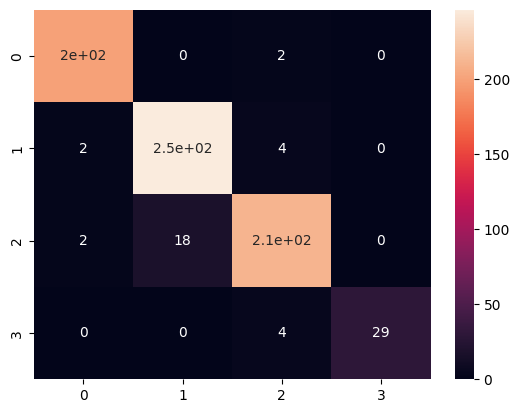

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

VIZINHOS = 3

modelo_knn = KNeighborsClassifier(n_neighbors=VIZINHOS)

modelo_knn.fit(X_treino, y_treino)

y_pred_knn = modelo_knn.predict(X_teste)

e = accuracy_score(y_teste, y_pred_knn)

confusao = confusion_matrix(y_teste, y_pred_knn)

sns.heatmap(confusao, annot = True)

# VALIDACAO CRUZADAAAAAAAAAAAAAA

## REFERNECIAS

https://edisciplinas.usp.br/pluginfile.php/7509547/mod_resource/content/2/ClassificaçãoeRegressão.pdf

https://www.kaggle.com/code/prashant111/adaboost-classifier-tutorial

https://www.youtube.com/watch?v=5nS14oaOj1g

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html